<a href="https://colab.research.google.com/github/HoangLong1907/DeepLearning-CS431/blob/main/Baitap/BT1_Handwritten.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import mnist

In [ ]:
from keras.optimizers import SGD
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import  Activation, Flatten, Dense, Conv2D, MaxPooling2D

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
#adding a function to build the Lenet structure
def build_lenet(width, height, depth, classes, weightsPath = None):
  #Initialize the model
  model = Sequential()
  
  # n = 2, k = 3
  #The first set of CONV -> ReLU -> POOL layers
  model.add(Conv2D(6, (3, 3), padding="same", input_shape=(height, width, depth))) #same là dùng padding, valid là không
  model.add(Activation("relu"))
  model.add(Conv2D(6, (3,3), padding="same"))
  model.add(Activation("relu"))
  model.add(Conv2D(6, (3,3), padding="same"))
  model.add(Activation("relu"))
  model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

  #The second set of CONV -> ReLU -> POOl layers
  model.add(Conv2D(16, (3,3), padding="same"))
  model.add(Activation("relu"))
  model.add(Conv2D(16, (3,3), padding="same"))
  model.add(Activation("relu"))
  model.add(Conv2D(16, (3,3), padding="same"))
  model.add(Activation("relu"))
  model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))


  #The set of FC -> ReLU layers
  model.add(Flatten())
  model.add(Dense(500))
  model.add(Activation("relu"))

  #The softmax classifier
  model.add(Dense(classes))
  model.add(Activation("softmax"))

  #If a weight path is supplies, the load the weights
  if weightsPath is not None:
    model.load_weights(weightsPath)

  #Return the constructed network architecture
  return model 

In [ ]:
#adding a ultility function to graph the training history
def graph_traning_history(history):
  plt.rcParams["figure.figsize"] = (12,9)

  plt.style.use('ggplot')

  plt.figure(1)

  #sumarize history for accuracy
  plt.subplot(211)
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Training', 'Validation'], loc='lower right')

  #sumarize hisory for loss
  plt.subplot(212)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Training', 'Validation'], loc='upper right')

  plt.tight_layout()
  plt.show()

In [ ]:
 print('[INFO] Loading the MNIST dataset...')
 (trainData, trainLabels), (testData, testLabels) = mnist.load_data()
 

[INFO] Loading the MNIST dataset...


In [ ]:
#Reshape the data matrix from (samples, height, width) to (samples, height, width, depth)
#Depth (i.e. channels) is 1 since MNIST only has grayscale images
trainData = trainData[:, :, :, np.newaxis]
testData = testData[:, :, :, np.newaxis]

In [ ]:
#Rescale the data from value between [0-255] to [0-1.0]
trainData = trainData / 255.0
testData = testData / 255.0

In [ ]:
#The labels come as a single digit , indicating the class
#We need a categorical vector as the label, so we transform it
#'0' become [1,0,0,0,0,0,0,0,0,0]
#'1' become [0,1,0,0,0,0,0,0,0,0]
#'2' become [0,0,1,0,0,0,0,0,0,0]
trainLabels = np_utils.to_categorical(trainLabels, 10)
testLabels = np_utils.to_categorical(testLabels, 10)

In [ ]:
#Build and Compile the model
print('[INFO] Building and compiling the Lenet model...')
opt = SGD(lr=0.01)
model = build_lenet(width=28,
                    height=28,
                    depth=1,
                    classes=10,
                    weightsPath=None)

model.compile(loss="categorical_crossentropy",
              optimizer=opt,
              metrics=["accuracy"])

[INFO] Building and compiling the Lenet model...


In [ ]:
print('[INFO] Training the model...')

history = model.fit(trainData,
                    trainLabels,
                    batch_size=128,
                    epochs=20,
                    validation_data=(testData, testLabels),
                    verbose=1)

[INFO] Training the model...
Epoch 1/20
469/469 [==============================] - 3s 5ms/step - loss: 2.1574 - accuracy: 0.1877 - val_loss: 0.3419 - val_accuracy: 0.8967
Epoch 2/20
469/469 [==============================] - 2s 5ms/step - loss: 0.2979 - accuracy: 0.9079 - val_loss: 0.1400 - val_accuracy: 0.9580
Epoch 3/20
469/469 [==============================] - 2s 5ms/step - loss: 0.1506 - accuracy: 0.9537 - val_loss: 0.1017 - val_accuracy: 0.9681
Epoch 4/20
469/469 [==============================] - 2s 5ms/step - loss: 0.1072 - accuracy: 0.9669 - val_loss: 0.0793 - val_accuracy: 0.9764
Epoch 5/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0833 - accuracy: 0.9742 - val_loss: 0.0675 - val_accuracy: 0.9787
Epoch 6/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0697 - accuracy: 0.9784 - val_loss: 0.0582 - val_accuracy: 0.9822
Epoch 7/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0659 - accuracy: 0.9791 - val_loss: 0.0647 

In [ ]:
print('[INFO] Evaluating the Model...')
(eval_loss, eval_accuracy) = model.evaluate(testData,
                                            testLabels,
                                            batch_size = 128,
                                            verbose=1)
print('[INFO] accuracy: {:.2f}%'.format(eval_accuracy*100))
print('[INFO] Loss: {}'.format(eval_loss))

[INFO] Evaluating the Model...
79/79 [==============================] - 0s 3ms/step - loss: 0.0466 - accuracy: 0.9867
[INFO] accuracy: 98.67%
[INFO] Loss: 0.04657895117998123


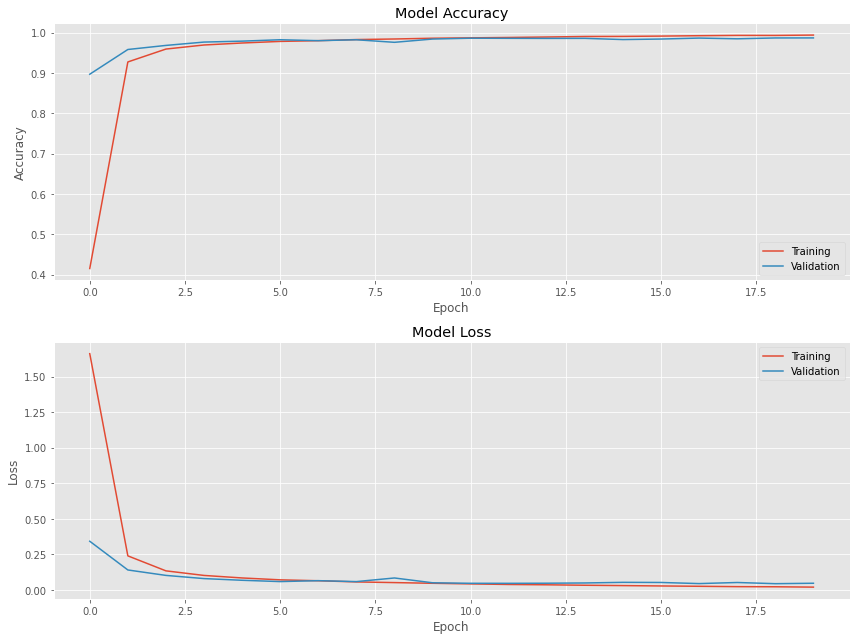

In [ ]:
#Visualize the trainng history
graph_traning_history(history)

In [ ]:
print('[INFO] Saving the model weights to file...')
model.save_weights('/content/lenet_weights.hdf5', overwrite = True)

[INFO] Saving the model weights to file...




[INFO] Predicted: 1, Actual: 9


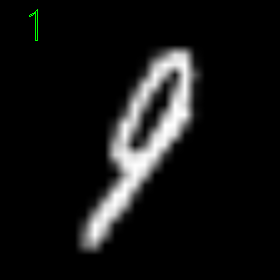



[INFO] Predicted: 2, Actual: 2


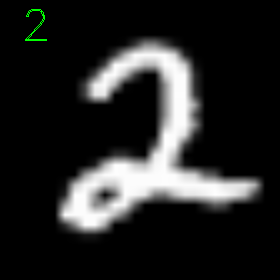



[INFO] Predicted: 8, Actual: 8


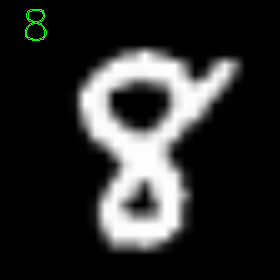



[INFO] Predicted: 8, Actual: 8


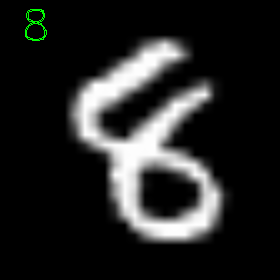



[INFO] Predicted: 3, Actual: 3


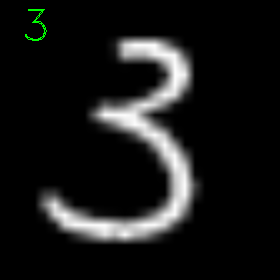



[INFO] Predicted: 7, Actual: 7


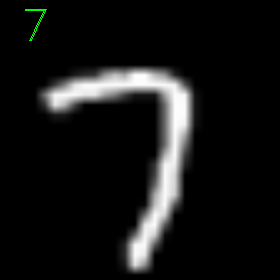



[INFO] Predicted: 0, Actual: 0


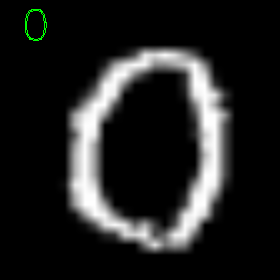



[INFO] Predicted: 6, Actual: 6


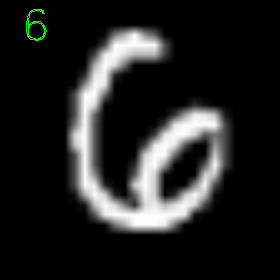



[INFO] Predicted: 5, Actual: 5


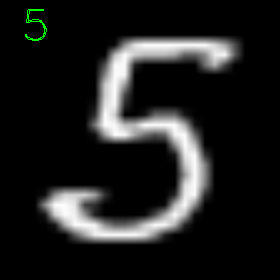



[INFO] Predicted: 3, Actual: 3


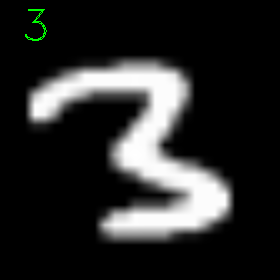

In [ ]:
#Randomly select a few samples from the test dataset to evaluate

for i in np.random.choice(np.arange(0, len(testLabels)), size=(10,)):
  #Use the model to classify the digit 
  probs = model.predict(testData[np.newaxis, i])
  prediction = probs.argmax(axis=1)

  #Convert the digit data to a color image
  image = (testData[i] * 255).astype("uint8")
  image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

  #The image are in 28x28 size, much too small to see properly. So we resize them to 280*280 for viewing
  image = cv2.resize(image, (280,280), interpolation=cv2.INTER_LINEAR)

  #Add the predicted value on to the image
  cv2.putText(image, str(prediction[0]), (20,40),
              cv2.FONT_HERSHEY_DUPLEX, 1.5, (0, 255, 0), 1)
  
  print("\n")

  #Show image and prediction
  
  print('[INFO] Predicted: {}, Actual: {}'.format(
      prediction[0], np.argmax(testLabels[i])))
  cv2_imshow(image)
